In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
data_path = 'data'

data = pd.read_csv(os.path.join(data_path, 'affect.data_.csv',))
data.set_index(pd.to_datetime(data['Time']), drop=True, inplace=True)
data.drop(columns=['Time'], inplace=True)
data.head()

,Negative,Positive
Time,,
2017-01-01,0.950695,-0.790772
2017-02-01,0.811725,-0.761614
2017-03-01,1.101026,-1.165077
2017-04-01,1.437233,-1.334346
2017-05-01,0.860613,-0.527818


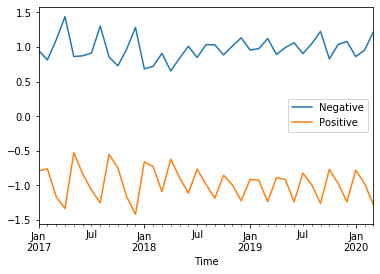

In [3]:
data.plot()
plt.show()

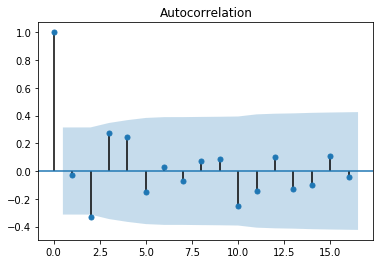

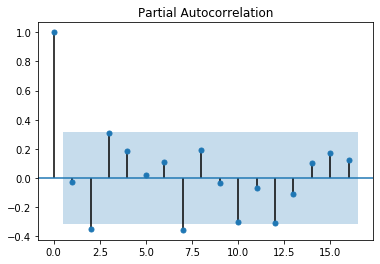

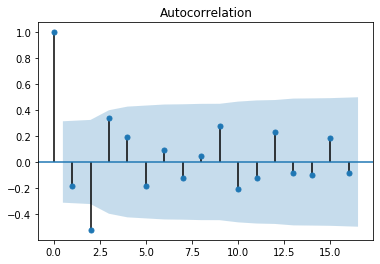

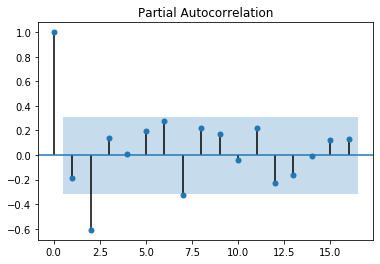

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Negative'])
plt.show()
plot_pacf(data['Negative'])
plt.show()

plot_acf(data['Positive'])
plt.show()
plot_pacf(data['Positive'])
plt.show()

In [12]:
year = ['2020'] * 8 + ['2021'] * 4
dom = ['20'] * 8 +  ['21'] * 4
index = []
for i in range(5,17):
    if i%12 == 0:
        month = 12
    else:
        month = i%12
    index.append(pd.to_datetime(f"{year[i-5]}-{month:02d}-{dom[i-5]}"))
    
index
test = pd.DataFrame(data=np.zeros((len(index), 2)), columns=data.columns)
test.index = pd.Series(index, name='Time')
test

,Negative,Positive
Time,,
2020-05-20,0.0,0.0
2020-06-20,0.0,0.0
2020-07-20,0.0,0.0
2020-08-20,0.0,0.0
2020-09-20,0.0,0.0
2020-10-20,0.0,0.0
2020-11-20,0.0,0.0
2020-12-20,0.0,0.0
2021-01-21,0.0,0.0


In [21]:
naive_pred = pd.DataFrame(np.repeat([data.mean().values], len(test), axis=0), columns=test.columns, index=test.index)
naive_pred

,Negative,Positive
Time,,
2020-05-20,0.973223,-0.973223
2020-06-20,0.973223,-0.973223
2020-07-20,0.973223,-0.973223
2020-08-20,0.973223,-0.973223
2020-09-20,0.973223,-0.973223
2020-10-20,0.973223,-0.973223
2020-11-20,0.973223,-0.973223
2020-12-20,0.973223,-0.973223
2021-01-21,0.973223,-0.973223


In [64]:
y_hat = test.copy()

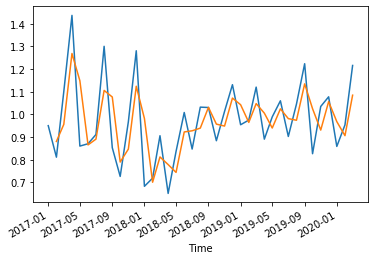

In [65]:
window_size=2
ax = plt.subplot(111)
plt.plot(data['Negative'], label='Train')
data['Negative'].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average_neg'] = np.repeat(data['Negative'].rolling(window_size).mean().iloc[-1], len(y_hat))

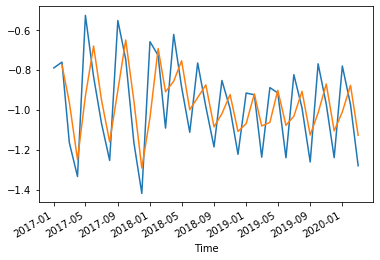

In [66]:
window_size=2
ax = plt.subplot(111)
plt.plot(data['Positive'], label='Train')
data['Positive'].rolling(window_size).mean().plot(ax=ax)
plt.show()
y_hat['naive_moving_average_pos'] = np.repeat(data['Positive'].rolling(window_size).mean().iloc[-1], len(y_hat))

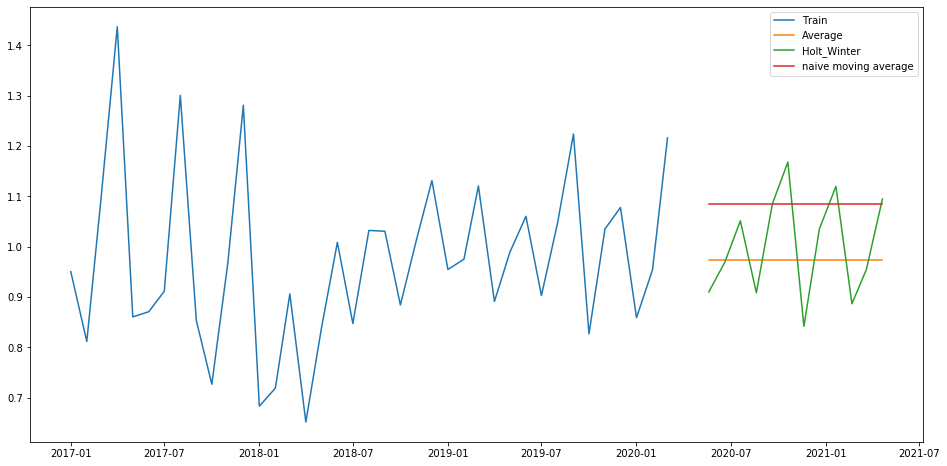

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data['Negative']) ,seasonal_periods=12 ,trend='add', seasonal='add', damped=True).fit()
y_hat['Holt_Winter_Neg'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data['Negative'], label='Train')
plt.plot(naive_pred['Negative'], label='Average')
plt.plot(y_hat['Holt_Winter_Neg'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average_neg'], label='naive moving average')
plt.legend(loc='best')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


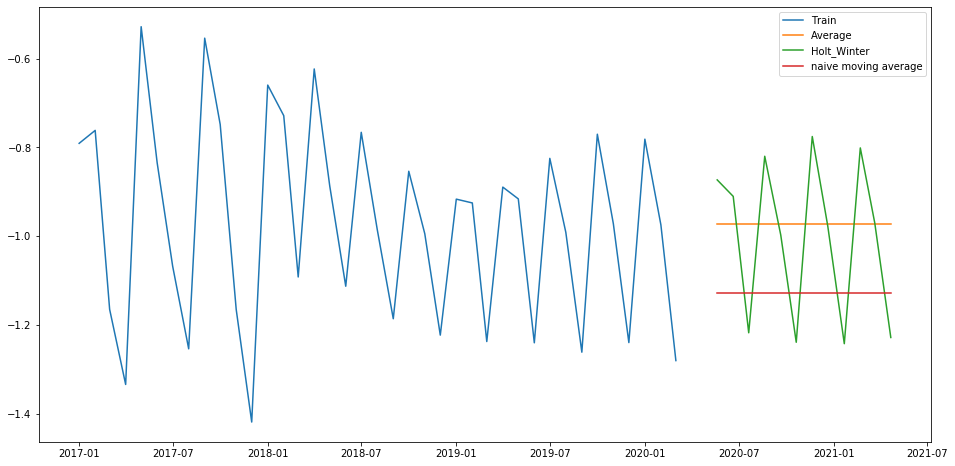

In [69]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_es = ExponentialSmoothing(np.asarray(data['Positive']) ,seasonal_periods=12 ,trend='add', seasonal='add', damped=True).fit()
y_hat['Holt_Winter_Pos'] = fit_es.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(data['Positive'], label='Train')
plt.plot(naive_pred['Positive'], label='Average')
plt.plot(y_hat['Holt_Winter_Pos'], label='Holt_Winter')
plt.plot(y_hat['naive_moving_average_pos'], label='naive moving average')
plt.legend(loc='best')
plt.show()

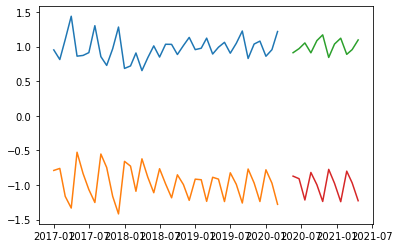

In [70]:
plt.plot(data[['Negative', 'Positive']], label='Train')
plt.plot(y_hat['Holt_Winter_Neg'], label='Holt_Winter')
plt.plot(y_hat['Holt_Winter_Pos'], label='Holt_Winter')
plt.show()

In [72]:
sub_path = 'submission'
y_hat[['Holt_Winter_Neg', 'Holt_Winter_Pos']].to_csv(os.path.join(sub_path, 'stage1_affect.csv'))

In [ ]:
# note:
# same issues regarding the missing month and the prediction for the first day of the month as in the life_satisfaction data!